<a href="https://colab.research.google.com/github/iorozco01/MammothPractice/blob/main/ML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data
https://archive.ics.uci.edu/dataset/2/adult

In [65]:
# Allow import of data on google drive (work done in google colab)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
adult_path = '/content/gdrive/MyDrive/Colab Notebooks/content/adult.data'

# Import pandas to store data set
import pandas

# View Data
data = pandas.read_csv(adult_path)
data.head()



,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [67]:
#Remove headers of data set and don't use first column as index column
data = pandas.read_csv(adult_path, header = None, index_col = False)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
#Changing col titles
data = pandas.read_csv(adult_path, header = None, index_col = False,
                       names = ['age', 'workclass', 'number', 'education', 'education-num',
                       'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain',
                       'capital-loss', 'hours-per-week', 'native-country', 'income'])

data.head()

,age,workclass,number,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
#cleaning data for only necessary stuff
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


**One Hot encoding:** Allows for the transormation from nominal/categorical data to numerical.
*   Data that has nominal data not numerical.

*   Decision tree can work with categorical data

*   One hot encoding creates a table where if you have cat and dog as your options, you create 2 boolean values called something like is_cat or is_dog and categorize as such

In [70]:
#Build data set with one hot encoding

dummies = pandas.get_dummies(data)

dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [71]:
#Get only data in dummy between agen and occupation transport moving
features = dummies.loc[:, 'age':'occupation_ Transport-moving']

features.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,38,40,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,53,40,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [72]:
# Closer look at table

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            32561 non-null  int64
 1   hours-per-week                 32561 non-null  int64
 2   workclass_ ?                   32561 non-null  bool 
 3   workclass_ Federal-gov         32561 non-null  bool 
 4   workclass_ Local-gov           32561 non-null  bool 
 5   workclass_ Never-worked        32561 non-null  bool 
 6   workclass_ Private             32561 non-null  bool 
 7   workclass_ Self-emp-inc        32561 non-null  bool 
 8   workclass_ Self-emp-not-inc    32561 non-null  bool 
 9   workclass_ State-gov           32561 non-null  bool 
 10  workclass_ Without-pay         32561 non-null  bool 
 11  education_ 10th                32561 non-null  bool 
 12  education_ 11th                32561 non-null  bool 
 13  education_ 12th 

In [73]:
#Independent variables from features

x = features.values
print(x)

[[39 40 False ... False False False]
 [50 13 False ... False False False]
 [38 40 False ... False False False]
 ...
 [58 40 False ... False False False]
 [22 20 False ... False False False]
 [52 40 False ... False False False]]


In [74]:
#Dependent variables, will be 0 if sample income isn't and 1 if it is

y = dummies['income_ >50K']
print(y)

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: income_ >50K, Length: 32561, dtype: bool


In [75]:
# Import package for linear regression of data set and to train model

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [76]:
#Create model for linear regression and add test and train data for it around 80% model accuracy

model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

model.fit(x_train, y_train)

print(model.score(x_test,y_test))

0.8067804937968308


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Scaling Data:** change range of values to make them more proportional to other columns


*   Ex. turning 0.001 into 100 when we are handling data like 200 and 300 in other columns to make things more uniform.
*   Only good when analyzing data that is being analyzed in the same way, so the numerical answers don't matter much (so stuff like plotting)
*   Also need to change the graph x and y axes, multiply them by the same thing basically to have uniform tables between things

In [77]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [78]:
# Import packages for scaling and data transformation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [79]:
#Transform nominal data into numerical
transformer = ColumnTransformer([
                                  (
                                      "scaling",
                                      StandardScaler(),
                                      ["age", "hours-per-week"]
                                  ),
                                  (
                                      "onehot",
                                      OneHotEncoder(sparse = False),
                                      ["workclass", "education", "gender", "occupation"]
                                  )
])

In [80]:
features = data.drop("income", axis = 1)

features.head()

,age,workclass,education,gender,hours-per-week,occupation
0,39,State-gov,Bachelors,Male,40,Adm-clerical
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial
2,38,Private,HS-grad,Male,40,Handlers-cleaners
3,53,Private,11th,Male,40,Handlers-cleaners
4,28,Private,Bachelors,Female,40,Prof-specialty


In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, data.income, random_state = 0)

# Train transfomer on x_train data which is based on features and data.income
# each of which is split randomly into training and test data with random.state = 0
# guaranteeing the same split every time it is run as there is no randomness

transformer.fit(x_train)

x_train_transfomed = transformer.transform(x_train)

print(x_train_transfomed)

#Data has now been transformed and can be used for machine learning model

[[ 1.49894077 -0.44509689  0.         ...  0.          0.
   1.        ]
 [ 2.38045121 -1.66848877  0.         ...  0.          0.
   0.        ]
 [ 0.2501343  -0.03729959  0.         ...  0.          0.
   0.        ]
 ...
 [-1.14559057 -0.03729959  0.         ...  1.          0.
   0.        ]
 [ 0.47051192  0.3704977   0.         ...  0.          0.
   0.        ]
 [-0.99867216  0.61517608  0.         ...  0.          0.
   0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
#Fit data to model

model = LogisticRegression()

model.fit(x_train_transfomed, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
#Test model

x_test_transformed = transformer.transform(x_test)


accuracy = model.score(x_test_transformed, y_test)

print(accuracy)

#Pumps out accuracy of prediction

0.8092371944478566


**Compare a Decision Tree and Linear Regression Model**

In [84]:
import numpy as np

#Create X and y data set

def create_data():
    random = np.random.RandomState(42)
    x = random.uniform(-3, 3, size = 100)
    y_no_randomness = np.sin((3*x) + x)
    y = (y_no_randomness + random.normal(size = len(x))) / 2

    return x.reshape(-1, 1),y

X, y = create_data()
print(X)
print(y)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.66793626]
 [-1.37190581]
 [ 1.97242505]
 [-0.85948004]
 [-1.31439294]
 [ 0.2561765 ]
 [-2.15445

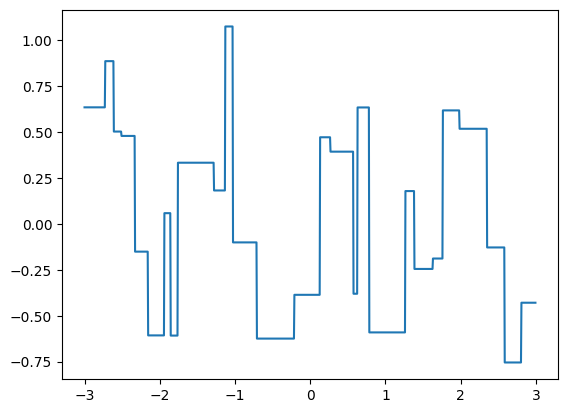

In [85]:
#Feed data to train DecisionTreeRegression model
# Predict on new data (X_test) and plot the results

from sklearn.tree import DecisionTreeRegressor

decision_model = DecisionTreeRegressor(min_samples_leaf = 3).fit(X,y)

import matplotlib.pyplot as plt

X_test = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

score = decision_model.predict(X_test)

plt.plot(X_test, score, label = "Decision Tree")

In [92]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X,y)

linear_results = linear_model.predict(X_test)

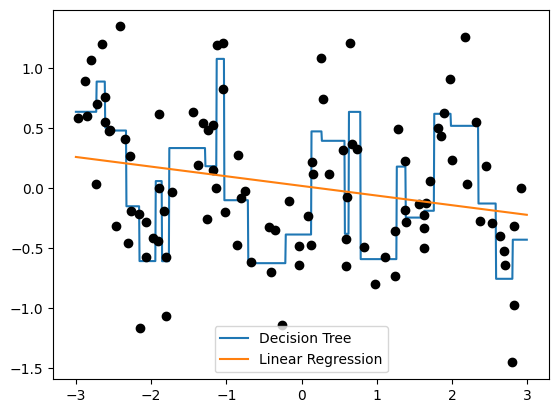

In [97]:
plt.plot(X_test, score, label = "Decision Tree")

plt.plot(X[:, 0], y, 'o', c = 'k')

plt.plot(X_test, linear_results, label = "Linear Regression") #Orange line

plt.legend()

**KBins Discretizer:** Bin continuous data into a discretizer

In [99]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')

discretizer.fit(X)

print(discretizer.bin_edges_)

[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [100]:
X_binned = discretizer.transform(X)

print(X_binned)

  (0, 3)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 6)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 8)	1.0
  (8, 6)	1.0
  (9, 7)	1.0
  (10, 0)	1.0
  (11, 9)	1.0
  (12, 8)	1.0
  (13, 2)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 3)	1.0
  (17, 5)	1.0
  (18, 4)	1.0
  (19, 2)	1.0
  (20, 6)	1.0
  (21, 1)	1.0
  (22, 2)	1.0
  (23, 3)	1.0
  (24, 4)	1.0
  :	:
  (75, 7)	1.0
  (76, 7)	1.0
  (77, 0)	1.0
  (78, 3)	1.0
  (79, 1)	1.0
  (80, 8)	1.0
  (81, 6)	1.0
  (82, 3)	1.0
  (83, 0)	1.0
  (84, 3)	1.0
  (85, 3)	1.0
  (86, 7)	1.0
  (87, 6)	1.0
  (88, 8)	1.0
  (89, 4)	1.0
  (90, 1)	1.0
  (91, 7)	1.0
  (92, 7)	1.0
  (93, 5)	1.0
  (94, 7)	1.0
  (95, 4)	1.0
  (96, 5)	1.0
  (97, 4)	1.0
  (98, 0)	1.0
  (99, 1)	1.0


In [103]:
encoding_discretizer = KBinsDiscretizer(n_bins = 10,
                                        strategy = "uniform",
                                        encode = "onehot-dense" )

encoding_discretizer.fit(X)

X_binned = encoding_discretizer.transform(X)

print(X_binned)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.